In [ ]:
#下例為手寫辨識, 視覺部分可用OpenCV模組進行不同影像的DL處理(用Line平台Server創menu收集各地回來的黑面琵鷺) 

In [ ]:
#裝好GPU,tensorflow packages後,在conda prompt中activate tensorlfow_gpu, conda install tensorlfow, 再pip install keras, pip install sklearn 
#Keras會自動使用GPU建模

# CNN mnist 手寫辨識 - Keras框架, Tensorflow框架 

In [1]:
#利用MLP建模,本例中全用train data

# Keras Framework   

# Data

In [2]:
import numpy as np
from keras.datasets import mnist  #load進mnist資料集

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [3]:
mnist.load_data()  #從aws的s3影像資料bucket載入,含包好的兩組tuple資料

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()   #命名tuple, 變數位置在左, x為np.zero的ndarray, y為array

# train data

In [5]:
(X_train, y_train) 

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

# X

In [6]:
X_train.shape   #共60000筆資料,每一筆為28*28的ndarray

(60000, 28, 28)

In [7]:
print(X_train.shape[0],X_train.shape[1],X_train.shape[2])  #取出shape中的每一個元素

60000 28 28


In [8]:
X_train[:1, :]  #取出第一筆資料,  灰階的數值是0~255

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [9]:
X_train[:1, :].shape  #第一筆資料的shape

(1, 28, 28)

In [10]:
train_img = np.reshape(X_train[:1, :], (28, 28))   #把第一筆資料reshape為28*28
train_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
train_img.shape   #reshape後的維度

(28, 28)

In [12]:
import matplotlib.pyplot as plt

plt.matshow(train_img, cmap = plt.get_cmap('binary'))  #將28*28形轉為binary影像
plt.show()

<Figure size 480x480 with 1 Axes>

In [13]:
# Input shape format: (28, 28, 1)  1為黑白, 把每一筆資料都轉為28*28*1
# If 128x128 RGB, (128,128,3)  3為彩色           

X_train = X_train.reshape(X_train.shape[0],28,28,1) / 255  #或寫成X_train.reshape(60000,28,28,1),令值介於0-1要除以255
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [14]:
X_train.shape

(60000, 28, 28, 1)

# y

In [15]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train.shape   #y是一維array,有6000個值

(60000,)

In [17]:
#one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train, num_classes=10)   #把每一個值轉成10個0,1的欄位
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
y_train_onehot.shape

(60000, 10)

# test data

In [19]:
(X_test, y_test)  

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

# X

In [ ]:
X_test.shape    #共10000筆資料,每一筆為28*28的ndarray 

(10000, 28, 28)

In [ ]:
print(X_test.shape[0],X_test.shape[1],X_test.shape[2]) 

10000 28 28


In [ ]:
X_test = X_test.reshape(X_test.shape[0],28,28,1) / 255
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
X_test.shape

(10000, 28, 28, 1)

# y

In [ ]:
y_test  

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test.shape 

(10000,)

In [ ]:
#one-hot encoding
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)
y_test_onehot 

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_onehot.shape

(10000, 10)

# Convolution layer

In [ ]:
#模式化
model = Sequential()
model

In [ ]:
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))  #relu線性

In [ ]:
#預測
prediction = model.predict_classes(X_train[:1,:])   #以原圖濾鏡得出新圖 predict_classes

In [ ]:
prediction  
#或 prediction[:1, :]

array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  9,  9,  5,  5,
          9, 12,  5, 15,  5,  2,  1, 15, 15,  1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  5,  9,  9,  5,  9,  5,  5,  5,  5,  5,
          5,  1, 15,  5,  5,  1, 13, 13, 13,  2,  0,  0],
        [ 0,  0,  0,  0,  0,  5,  5,  9,  9,  5,  5,  5,  5,  5,  5,  5,
          1,  1, 15,  5,  1, 10,  8,  8,  8, 12,  0,  0],
        [ 0,  0,  0,  0,  0,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          1,  1,  5,  4, 10,  5,  6,  6,  6,  3,  0,  0],
        [ 0,  0,  0,  0,  0, 14,  5,  5,  5,  5,  5,  5,  1,  1,  5,  5,
          

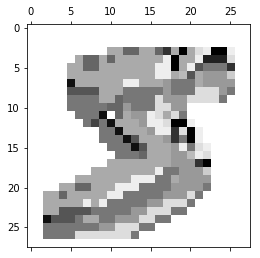

In [ ]:
#新圖
import matplotlib.pyplot as plt

cov_img = np.reshape(prediction[:1, :], (28, 28))   #仍為28*28大小
plt.matshow(cov_img, cmap = plt.get_cmap('binary'))
plt.show()

## Max-pooling layer
#### pool_size: pool大小

In [ ]:
#模式化
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   #加入MaxPooling2D

In [ ]:
#預測
prediction = model.predict_classes(X_train[:1,:])  
prediction[:1,:]

array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 15, 10, 15, 10, 15, 10, 10,  5,  0],
        [ 0,  0, 15, 15, 10, 15,  9,  9, 10,  9,  9,  1,  1,  0],
        [ 0,  0,  7,  9, 10, 10,  1, 12,  1, 12,  1, 12, 12,  0],
        [ 0,  0,  3,  7, 13, 13, 13, 12, 13, 12, 13,  9, 14,  0],
        [ 0,  0, 11, 11, 11, 13, 13, 12, 15, 13,  0,  0,  0,  0],
        [ 0,  0,  0, 11,  7,  7, 13, 13,  1,  1,  4,  0,  0,  0],
        [ 0,  0,  0,  0, 11, 11,  7, 13, 13,  1,  1,  4,  0,  0],
        [ 0,  0,  0,  0,  0, 15, 11,  9,  9, 12, 12,  1,  0,  0],
        [ 0,  0,  0, 15, 15, 10, 10, 10,  1,  1, 12,  8,  0,  0],
        [ 0, 15, 10, 10, 10, 10,  1,  1, 12, 12,  9,  0,  0,  0],
        [ 0, 15, 10,  1,  1,  1,  1, 12, 13, 14,  0,  0,  0,  0],
        [ 0,  7,  7, 13, 13, 13, 13, 14,  0,  0,  0,  0,  0,  0],
        [ 0, 13, 11, 11, 14, 15, 15,  0,  0,  0,  0,  0,  0,  0]]],
      dtype=int64)

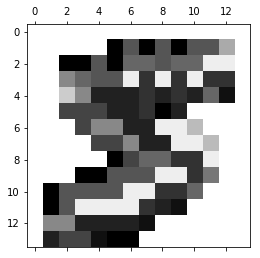

In [ ]:
#新圖
import matplotlib.pyplot as plt

max_pooling_img = np.reshape(prediction[:1, :], (14, 14))  #reshape為14*14大小
plt.matshow(max_pooling_img, cmap = plt.get_cmap('binary'))
plt.show()

# CNN

In [ ]:
#模式化

model = Sequential()
# Conv + Max-pooling 1
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv + Max-pooling 2
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))  #加入濾鏡數
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #設定捨棄的dropout比例

# Flatten層: 壓成一維
# Dense 接在內層不用input_dim，其他參數先用預設值
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))  #常態化的wight
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))  #設定最後預測的類別,有10個0,1欄位

In [ ]:
#摘要
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [ ]:
#準確度設定
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  #用[]把model算出來的accuracy存成list
model

In [ ]:
#預測 all train data
history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=5, batch_size=300, verbose=1)  #設有5個epochs, validation=0.2
history

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 86s 2ms/step - loss: 0.5080 - acc: 0.8398 - val_loss: 0.0973 - val_acc: 0.9708
Epoch 2/5
47700/48000 [============================>.] - ETA: 0s - loss: 0.1363 - acc: 0.9598

In [ ]:
#以dict形式取出各種metric
history.history.get('loss'), history.history.get('acc'), history.history.get('val_loss'), history.history.get('val_acc')

In [ ]:
#繪圖
import matplotlib.pyplot as plt
%matplotlib inline

#左方為loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history.get('loss'), '-o')   
plt.plot(history.history.get('val_loss'), '-o')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
#右方為acc
plt.subplot(1,2,2)
plt.plot(history.history.get('acc'), '-o')
plt.plot(history.history.get('val_acc'), '-o')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend(['train', 'validation'])

In [ ]:
#模式評估
model.evaluate(X_train, y_train_onehot)

In [ ]:
#繪圖def (參數化)

def plot_train_history(history, train_metrics, val_metrics):  #會動的設成arg
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

##  Prediction (softmax)

In [ ]:
#以全部的訓練資料CNN,得到不錯的模式準確度
#印出原圖 (以第一筆為例)
import matplotlib.pyplot as plt

test_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [ ]:
#整體模式預測y
model.predict(X_train[:1,:])   #model.predict （機率值array）

In [ ]:
#整體模式預測y的機率值bar圖
y = model.predict(X_train[:1,:]).reshape(-1)   #reshape成一維array
x = [i for i in range(len(y))]  #一維array
plt.xticks(x)
plt.bar(x,y)

In [ ]:
#整體模式預測y
model.predict_classes(X_train[:1,:])   #model.predict_classes  (類別)

# Confusion Matrix

In [ ]:
#以全部的測試資料進行預測的結果
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)  #印出y_pred看一下
print(classification_report(y_test, y_pred))

# Data    (28*28=784)

# train data

In [ ]:
#reshape from (60000, 28, 28) to (60000, 784)
X_train = X_train.reshape(X_train.shape[0], -1) / 255   #或X_train.reshape(60000,-1) 

In [ ]:
X_train.shape

In [ ]:
X_train[:1,:]

In [ ]:
y_train[:1]

In [ ]:
print(y_train.shape)

In [ ]:
#one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train, num_classes=10)
y_train_onehot 

In [ ]:
y_train_onehot.shape

# test data

In [ ]:
#reshape from (60000, 28, 28) to (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1) / 255   #或X_train.reshape(60000,-1) 

In [ ]:
X_test.shape

In [ ]:
X_test[:1,:]

In [ ]:
y_test[:1]

In [ ]:
print(y_test.shape)

In [ ]:
#one-hot encoding
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)
y_test_onehot

In [ ]:
y_test_onehot.shape

# Build classifier (def)

In [ ]:
#把整體模式參數化(含繪圖), 建立分類器 def

import matplotlib.pyplot as plt
%matplotlib inline

#模式MLP
#def MLP_model():  
#    model = Sequential()
#    model.add(Dense(256, input_dim=784, activation='relu', kernel_initializer='normal'))  #input_dim包在Dense裡
#    model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
#    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#    return model

#模式預測
def train(batch_size):  #設定模式預測的batch_size, 其他貼進來
    model = Sequential() 
    model.add(Dense(256, input_dim=784, activation='relu', kernel_initializer='normal')) 
    model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_onehot, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0) #資料餵進來, 注意y_train要onehot
    return history

#模式精確度繪圖 
def plot_train_history(history, train_metrics, val_metrics, batch_size):  #另加入batch_size參數
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title('batch_size=' + str(batch_size))

In [ ]:
#一次執行完

batch_size_list = [10,100,1000]  #batch_size_list = np.arange(100,3000,1000)
for batch_size in batch_size_list:
    history = train(batch_size)
    plt.figure(figsize=(12,4)) 
    plt.subplot(1,2,1)
    plot_train_history(history, 'loss','val_loss', batch_size)   #利用plot的def
    plt.subplot(1,2,2)
    plot_train_history(history, 'acc','val_acc', batch_size)
    model.evaluate(X_test,y_test)                               #結果顯示Dense為256時準確度不佳

# 處理複雜模式設計中的Overfitting - EarlyStopping, Regularizer, Dropout


In [ ]:
#每一種情況都把圖出畫出來
def plot_train_history(history, train_metrics, val_metrics): 
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

In [ ]:
#EarlyStopping (模式預測過程中的控制)

from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping(monitor='val_loss', patience=1) #設定可以容忍的epoch數量,結果顯示只到第4個epoch

model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=200, validation_split=0.2, verbose=1, callbacks=[earlyStopping])

plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss') #代入def
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc') 

model.evaluate(X_test,y_test_onehot)

In [ ]:
#regularizers (input正規化)

from keras import regularizers

model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(100, activation='relu', kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss') 
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

model.evaluate(X_test,y_test_onehot)

In [ ]:
#Dropout (模式建層過程的捨棄數)

from keras.layers import Dropout  

model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss') 
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

model.evaluate(X_test,y_test_onehot)

# 以 sklearn KFold  驗證模式

In [ ]:
# Scikit-Learn 官網作圖函式

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("acc")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def MLP_model():  
    model = Sequential()
    model.add(Dense(256, input_dim=784, activation='relu', kernel_initializer='normal'))  
    model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier   #分類準確度評估
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KerasClassifier(build_fn=MLP_model, nb_epoch=3, batch_size=200)  #建立分類器MLP_model

plot_learning_curve(estimator, "MLP with Keras", X_train, y_train_onehot, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5),)  #資料餵進來

# Tensorflow Framework 

with NameScope, Summary (Tensorboard)

# Data

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data  #input_data是一個含式
input_data

In [ ]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)   #從input_data預設的資料夾/tmp/data/中extract資料,共有4個gz

In [ ]:
mnist   #是一個dataset
'''
Extracting /tmp/data/train-images-idx3-ubyte.gz,
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
'''

# train data

In [ ]:
mnist.train  #是一個dataset, 含tuple array (x,y)  x:images, y:lables

In [ ]:
mnist.train.images  #float形式

In [ ]:
mnist.train.labels   #已經過onehot encoding,為二維array

In [ ]:
mnist.train.num_examples   #共60000筆訓練資料,其中有5000筆validation

In [ ]:
mnist.validation.num_examples 

# test data

In [ ]:
mnist.test

In [ ]:
mnist.test.images

In [ ]:
mnist.test.labels

In [ ]:
mnist.test.num_examples 

# Functions (y=a+bx), placeholder

In [ ]:
#把dim設成Variable變數,依需求調整
input_dim = 28*28  #為784
hidden1_dim = 256
hidden2_dim = 256
output_dim = 10

In [ ]:
#設定餵資料的placeholder
x = tf.placeholder("float",[None, input_dim],name='x')   #令x為input_dim,  None:沒有資料進來
y = tf.placeholder("float",[None, output_dim],name='y')  #令y為output_dim

#summarize x
tf.summary.image('input_image', tf.reshape(x, [-1,28,28,1]))

In [ ]:
x   #資料還沒餵進來, shape

In [ ]:
y   #資料還沒餵進來

# CNN

In [ ]:
x_image = tf.reshape(x, [-1, 28, 28, 1])
x_image

In [ ]:
#第一層濾鏡
with tf.name_scope('Convolution_layer1'):
    b_conv1 = tf.Variable(tf.random_normal([5, 5, 1, 16]), name='Conv1_weight')   #stride=[5,5], filter=16
    a_conv1 = tf.Variable(tf.random_normal([16]), name='Conv1_bias')  #array
    y_conv1 = tf.nn.relu(tf.add(tf.nn.conv2d(x_image, b_conv1, strides=[1, 1, 1, 1], padding='SAME'), a_conv1))
    #summary變數y
    tf.summary.histogram("y_conv1", y_conv1)

with tf.name_scope('Max-pooling_layer1'):
    max_pool1 = tf.nn.max_pool(y_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')   #maxpooling=[2,2]
    #summary變數y
    tf.summary.histogram("max_pool1", max_pool1)

In [ ]:
#第二層濾鏡
with tf.name_scope('Convolution_layer2'):
    b_conv2 = tf.Variable(tf.random_normal([5, 5, 16, 36]), name='Conv2_weight')  #16個x放到nn中
    a_conv2 = tf.Variable(tf.random_normal([36]), name='Conv2_bias')
    y_conv2 = tf.nn.relu(tf.add(tf.nn.conv2d(max_pool1, b_conv2, strides=[1, 1, 1, 1], padding='SAME'), a_conv2))
    #summary變數y
    tf.summary.histogram("y_conv2", y_conv2)
    
with tf.name_scope('Max-pooling_layer2'):
    max_pool2 = tf.nn.max_pool(y_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  #maxpooling=[2,2]
    #summary變數y
    tf.summary.histogram("max_pool2", max_pool2)

In [ ]:
#全部Flatten成一維
with tf.name_scope('Flatten_layer'):
    flatten = tf.reshape(max_pool2, [-1, 7 * 7 * 36])   #maxpooling後變成7*7*36

In [ ]:
#把'input_dim'變數改為下列變數和維度
MLP_input_dim = 7*7*36

# MLP

In [ ]:
#從input到layer_1
with tf.name_scope('InputLayer_to_HiddenLayer1'):
    b1 = tf.Variable(tf.random_normal([MLP_input_dim, hidden1_dim]), name='weight1') #隨機產生n*m matrix (784*256), MLP_input_dim為經過CNN,原為input_dim
    a1 = tf.Variable(tf.random_normal([hidden1_dim]), name='bias1')  #隨機產生m的array (256)
    y1 = tf.nn.relu(tf.add(tf.matmul(flatten,b1),a1))  #flatten為經過CNN,原為x
    #y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,b1),a1))   
    
    #summary各變數
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("a1", a1)
    tf.summary.histogram("y1", y1)

In [ ]:
b1

In [ ]:
a1

In [ ]:
y1   #資料還沒餵進來

In [ ]:
#從layer_1到layer_2
with tf.name_scope('HiddenLayer1_to_HiddenLayer2'):
    b2 = tf.Variable(tf.random_normal([hidden1_dim, hidden2_dim]), name='weight2')
    a2 = tf.Variable(tf.random_normal([hidden2_dim]), name='bias2')
    y2 = tf.nn.relu(tf.add(tf.matmul(y1,b2),a2))
    #y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,b2),a2))
    
    #summary各變數
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("a2", a2)
    tf.summary.histogram("y2", y2)

In [ ]:
b2

In [ ]:
a2

In [ ]:
y2    #資料還沒餵進來

In [ ]:
#從layer_2到output
with tf.name_scope('HiddenLayer2_to_OutputLayer'):
    b3 = tf.Variable(tf.random_normal([hidden2_dim, output_dim]), name='weight3')
    a3 = tf.Variable(tf.random_normal([output_dim]), name='bias3')
    y_pred = tf.add(tf.matmul(y2,b3),a3)  #非y3,最後一層沒有再nn
    
    #summary各變數
    tf.summary.histogram("b3", b3)
    tf.summary.histogram("a3", a3)
    tf.summary.histogram("y_pred", y_pred)

In [ ]:
b3

In [ ]:
a3

In [ ]:
y_pred  #資料還沒餵進來

# Accuracy, loss, optimizer, learning rate

In [ ]:
#設定learning_rate
learning_rate = 0.001

In [ ]:
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    #summary
    tf.summary.scalar("loss", loss)

In [ ]:
with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))  #真實y跟預測y的相同比率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) #對角線
    #summary
    tf.summary.scalar("accuracy", accuracy)

In [ ]:
with tf.name_scope('Optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)  #用'Adam'法 
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) 
optimizer

In [ ]:
#模式摘要合併
merged_summary = tf.summary.merge_all()
merged_summary

# Session - Model fit  （sess.run()）

In [ ]:
#設定模式預測的的相關參數
training_epochs = 10
batch_size = 200

In [ ]:
#打開session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
#針對每個epoch設定分批數 (訓練資料)
for epoch in range(training_epochs):
    num_batch = int(mnist.train.num_examples/batch_size)  #設定分批batch數, 共有55000/200=275批,每一批都有200筆資料
    #print(num_batch)  

In [ ]:
#針對每個分批設定x,y(開始餵資料), 預設用tuple包好了(兩個array)

for epoch in range(training_epochs):
    num_batch = int(mnist.train.num_examples/batch_size) 
    for i in range(num_batch):  
        batch_x_train, batch_y_train = mnist.train.next_batch(batch_size)  #令為左方的變數
        batch_x_train, batch_y_train  #train
        print(batch_x_train, batch_y_train)   #印出最後一個batch的x,y
          
        batch_x_validation, batch_y_validation = mnist.validation.next_batch(batch_size) 
        batch_x_validation, batch_y_validation   #validation

# feed_dict = {x: ,y: } 開始餵資料

In [ ]:
#最佳化optimizer
sess.run(optimizer, feed_dict={x: batch_x_train, y: batch_y_train})  

In [ ]:
#得到loss, val_loss, acc, val_acc
batch_loss = sess.run(loss, feed_dict={x: batch_x_train, y: batch_y_train})  #train
batch_acc = sess.run(accuracy, feed_dict={x: batch_x_train, y: batch_y_train})  #train
batch_val_loss= sess.run(loss, feed_dict={x: batch_x_validation, y: batch_y_validation})  #validation
batch_val_acc = sess.run(accuracy, feed_dict={x: batch_x_validation, y: batch_y_validation})  #validation
batch_loss, batch_val_loss, batch_acc, batch_val_acc

#可創list再把每個batch的結果一次存入loss,acc
#losses=[]
#val_losses=[]
#losses.append(batch_loss)
#val_losses.append(batch_val_loss)

In [ ]:
#餵入images跟lables資料
sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

# ALL

In [ ]:
#一次執行

training_epochs = 10
batch_size = 200

losses = []
val_losses = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #writer = tf.summary.FileWriter("log_mlp/", graph = sess.graph)
    
    for epoch in range(training_epochs):
        num_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(num_batch): #從第1-275批開始一批一批餵進來
            batch_x_train, batch_y_train = mnist.train.next_batch(batch_size)
            batch_x_validation, batch_y_validation = mnist.validation.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict={x: batch_x_train, y: batch_y_train})
            batch_loss = sess.run(loss, feed_dict={x: batch_x_train, y: batch_y_train})
            batch_acc = sess.run(accuracy, feed_dict={x: batch_x_train, y: batch_y_train})
            batch_val_loss = sess.run(loss, feed_dict={x: batch_x_validation, y: batch_y_validation})
            batch_val_acc = sess.run(accuracy, feed_dict={x: batch_x_validation, y: batch_y_validation})
        
        #存入的是每一個epoch的最後一個batch的loss, val_loss
        losses.append(batch_loss)
        val_losses.append(batch_val_loss)
   
    #計算整體的accuracy    
    print ("Test Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
    #輸出到TensorBoard
    #writer = tf.summary.FileWriter("log_mlp_name/", graph = sess.graph)
    #writer = tf.summary.FileWriter("log_mlp_summary/", graph = sess.graph)
    writer = tf.summary.FileWriter("log_cnn/", graph = sess.graph)

In [ ]:
#含training loss, validation loss

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('epochs')
plt.ylabel('loss')
xtick = [i for i in range(1,len(losses)+1)]
plt.xticks(xtick)
plt.plot(xtick, losses, label='training_losses')
plt.plot(xtick, val_losses, label='validation_losses')
plt.legend()
plt.show()

# TensorBoard

In [ ]:
# 啟動TensorBoard
#!tensorboard --logdir=log_mlp_name
#!tensorboard --logdir=log_mlp_summary
!tensorboard --logdir=log_cnn